This is me messing around with a SpaCy Ner bit of code Tom shared w/ me, as a part of our first round of data analysis.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
#from datasets import load_dataset
import spacy
import json
from datetime import datetime
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import os


In [2]:
os.chdir('c:\\Users\\willo\\Desktop\\test repo\\final-project-repo-team-7')
from scripts.clean_data import clean_text

Exploring + Formatting dataset

In [3]:

df = pd.read_csv('data/all_speeches.csv', index_col= 'Unnamed: 0')
df.head()

,title,doc_name,url,date,transcript,transcript_html,president,introduction,video,audio
0,"July 2, 1807: Proclamation in Response to the ...",/the-presidency/presidential-speeches/july-2-1...,https://millercenter.org/the-presidency/presid...,1807-07-02T13:03:58-04:56,During the wars which for some time have unhap...,<p>During the wars which for some time have un...,Thomas Jefferson,"Restating the American policy of neutrality, J...",NaN,NaN
1,"December 3, 1900: Fourth Annual Message",/the-presidency/presidential-speeches/december...,https://millercenter.org/the-presidency/presid...,1900-12-03T13:00:00-05:00,To the Senate and House of Representatives: \n...,<p>To the Senate and House of Representatives:...,William McKinley,NaN,NaN,NaN
2,"December 2, 1806: Sixth Annual Message",/the-presidency/presidential-speeches/december...,https://millercenter.org/the-presidency/presid...,1806-12-02T13:03:58-04:56,TO THE SENATE AND HOUSE OF REPRESENTATIVES OF ...,<p>TO THE SENATE AND HOUSE OF REPRESENTATIVES ...,Thomas Jefferson,Jefferson addresses the crisis with Spain at l...,NaN,NaN
3,"January 5, 1838: Proclamation",/the-presidency/presidential-speeches/january-...,https://millercenter.org/the-presidency/presid...,1838-01-05T13:03:58-04:56,Whereas information having been received of a ...,<p>Whereas information having been received of...,Martin Van Buren,NaN,NaN,NaN
4,"December 17, 1895: Message Regarding Venezuela...",/the-presidency/presidential-speeches/december...,https://millercenter.org/the-presidency/presid...,1895-12-17T16:24:00-05:00,To the Congress:<br />\nIn my annual message a...,<p>To the Congress:<br />\nIn my annual messag...,Grover Cleveland,"<p>From December 1894 through June 1897, the U...",NaN,NaN


In [25]:
#Temporary because shit just wasn't working lol
def clean_text(text):
    '''
    Cleans the text transcripts
    '''

    #Deals w/ empty transcripts
    if pd.isna(text):
        return ""
    
    #make lowercase
    text = text.lower()

    #remove <> statements
    text = re.sub(r"<[^>]*>", ' ', text)

    #remove white space, special characters
    text = text.strip()
    text = re.sub(r'[^a-zA-Z0-9 ]', ' ', text)

    #prevents double spaces
    text = text.replace('  ', ' ')

    #set and return
    cleaned = text  # placeholder
    
    return cleaned

In [27]:
print("Missing values in dataset:")
print(df.isnull().sum())

#Create new column w/ cleaned transcripts
df['clean_transcript'] = [clean_text(text) for text in df['transcript']]
df.head()


Missing values in dataset:
title                 0
doc_name              0
url                   2
date                  0
transcript            0
transcript_html       0
president             0
introduction        291
video               677
audio               513
clean_trancript       0
clean_transcript      0
dtype: int64


,title,doc_name,url,date,transcript,transcript_html,president,introduction,video,audio,clean_trancript,clean_transcript
0,"July 2, 1807: Proclamation in Response to the ...",/the-presidency/presidential-speeches/july-2-1...,https://millercenter.org/the-presidency/presid...,1807-07-02T13:03:58-04:56,During the wars which for some time have unhap...,<p>During the wars which for some time have un...,Thomas Jefferson,"Restating the American policy of neutrality, J...",NaN,NaN,during the wars which for some time have unhap...,during the wars which for some time have unhap...
1,"December 3, 1900: Fourth Annual Message",/the-presidency/presidential-speeches/december...,https://millercenter.org/the-presidency/presid...,1900-12-03T13:00:00-05:00,To the Senate and House of Representatives: \n...,<p>To the Senate and House of Representatives:...,William McKinley,NaN,NaN,NaN,to the senate and house of representatives at ...,to the senate and house of representatives at...
2,"December 2, 1806: Sixth Annual Message",/the-presidency/presidential-speeches/december...,https://millercenter.org/the-presidency/presid...,1806-12-02T13:03:58-04:56,TO THE SENATE AND HOUSE OF REPRESENTATIVES OF ...,<p>TO THE SENATE AND HOUSE OF REPRESENTATIVES ...,Thomas Jefferson,Jefferson addresses the crisis with Spain at l...,NaN,NaN,to the senate and house of representatives of ...,to the senate and house of representatives of ...
3,"January 5, 1838: Proclamation",/the-presidency/presidential-speeches/january-...,https://millercenter.org/the-presidency/presid...,1838-01-05T13:03:58-04:56,Whereas information having been received of a ...,<p>Whereas information having been received of...,Martin Van Buren,NaN,NaN,NaN,whereas information having been received of a ...,whereas information having been received of a ...
4,"December 17, 1895: Message Regarding Venezuela...",/the-presidency/presidential-speeches/december...,https://millercenter.org/the-presidency/presid...,1895-12-17T16:24:00-05:00,To the Congress:<br />\nIn my annual message a...,<p>To the Congress:<br />\nIn my annual messag...,Grover Cleveland,"<p>From December 1894 through June 1897, the U...",NaN,NaN,to the congressin my annual message addressed ...,to the congress in my annual message addresse...


In [10]:
# now make a column of the tokenized values for each of these?
# whatever next spacy step is...

Actual SpaCy Stuff now

In [28]:
nlp = spacy.load("en_core_web_sm")

# Preprocessing with spaCy
def spacy_preprocess(text):
    doc = nlp(text)
    tokens = [
        token.lemma_.lower()
        for token in doc
        if token.is_alpha and not token.is_stop
    ]
    return ' '.join(tokens)
# Apply to sample (spaCy is slow)
sample = df['clean_transcript'].head(100).tolist()
processed = [spacy_preprocess(t) for t in sample]
processed[:2]

['war time unhappily prevail power europe united states america firm principle peace endeavor justice regular discharge national social duty friendly office situation admit maintain belligerent accustomed relation friendship hospitality commercial intercourse take question animate power permit entertain wish restoration general peace observe good faith neutrality assume believe instance departure duty justly impute nation free use harbor water mean refit refreshment succor sick suffering time equal principle extend amidst constant recurrence act insubordination law violence person trespass property citizen commit officer belligerent party receive truth abuse law hospitality exception habitual commander british armed vessel hover coast frequent harbor subject repeat representation government assurance give proper order restrain limit right respect friendly nation order assurance effect instance punishment past wrong take place length deed transcend hitherto see suffer bring public sensi

Alright now we've got essentially a list (processed) of the lemmatized/tokenized scripts (each item in processed) which contains a number of individual tokens.

From here, we can try and find the most commonly appearing NORPs

In [29]:
from collections import Counter

# download once
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

In [17]:
type(processed[0])

str

In [30]:
# alright, crazy shit I kinda don't understand now
rows = []

#Note: I tried to run this on the processed list earlier and it totally flopped b/c lists don't
#have the .ent method this depends on, so I gotta run it again. IN future, can restructure to run faster
#and be more efficient (not nlp the same text more than once)
for text in df["clean_transcript"][:100]:
    doc = nlp(text)
    score = sid.polarity_scores(text)["compound"]
    for ent in doc.ents:
        if ent.label_ == "NORP":
            rows.append({"group": ent.text, "sentiment": score})

sent_df = pd.DataFrame(rows)

In [35]:
avg = sent_df.groupby("group")["sentiment"].mean().sort_values()

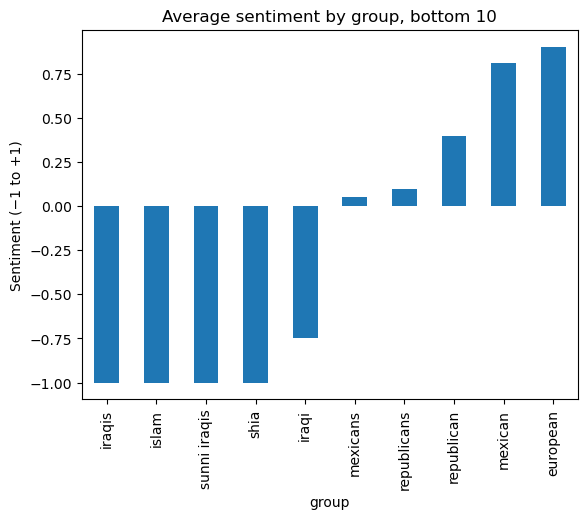

In [37]:
avg[:10].plot(kind="bar", title="Average sentiment by group, bottom 10")
plt.ylabel("Sentiment (−1 to +1)")
plt.show()

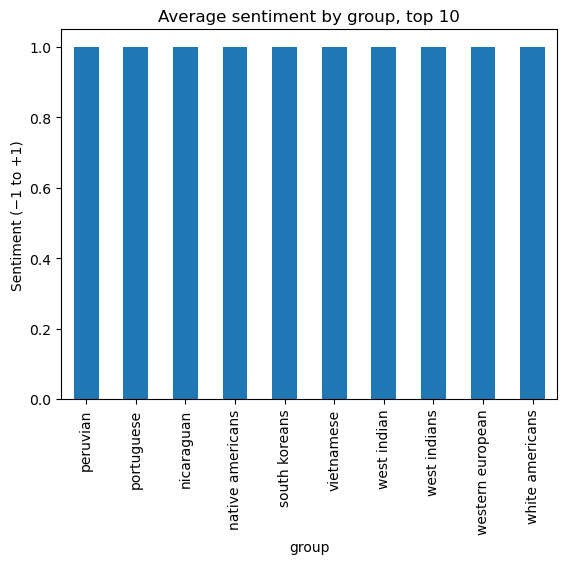

In [39]:
avg[-10:].plot(kind="bar", title="Average sentiment by group, top 10")
plt.ylabel("Sentiment (−1 to +1)")
plt.show()

Holy mother of racial prejudice and islamaphobia.

Future directions: look at trends of muslim / iraqi mentions over time. Look as specifically american stuff (think about african americans too). Look at americans over time.